# **Importing Libraries**

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Loading the dataset**

In [ ]:
olddata = pd.read_csv('/content/drive/MyDrive/Black Bucks/weatherAUS.csv')
olddata.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
olddata.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**counting values in prediction variable**

In [ ]:
pd.value_counts(olddata['RainTomorrow'])


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
yes = olddata[olddata.RainTomorrow == "Yes"]
no = olddata[olddata.RainTomorrow == "No"]

first of all let us evaluate the target and find out if our data is imbalanced or not

<Axes: xlabel='RainTomorrow', ylabel='count'>

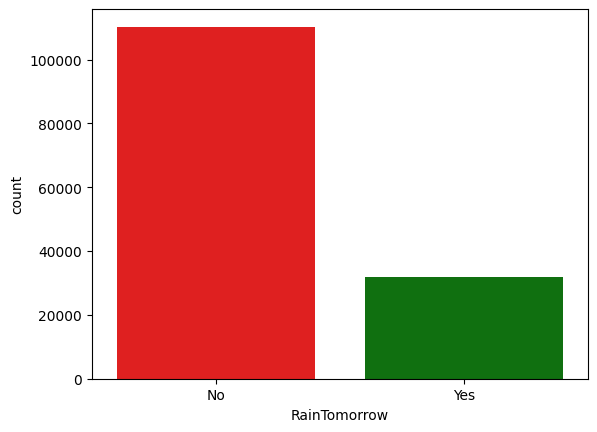

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["red","green"]
sns.countplot(x= olddata["RainTomorrow"], palette= cols)

In [ ]:
print(yes.shape)
print(no.shape)

(31877, 23)
(110316, 23)


**Under sampling the data**

taking sample to equalize the data

In [ ]:
yes_data = yes.sample(31877)
no_data = no.sample(50000)

**concatenating the data**

In [ ]:
data = pd.concat([yes_data,no_data],axis = 0)

<Axes: xlabel='RainTomorrow', ylabel='count'>

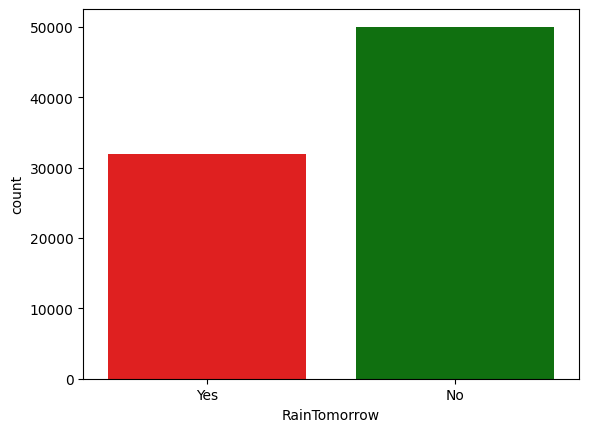

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["red","green"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

**Correlation amongst numeric attributes**

<ipython-input-12-8a2cf40265ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

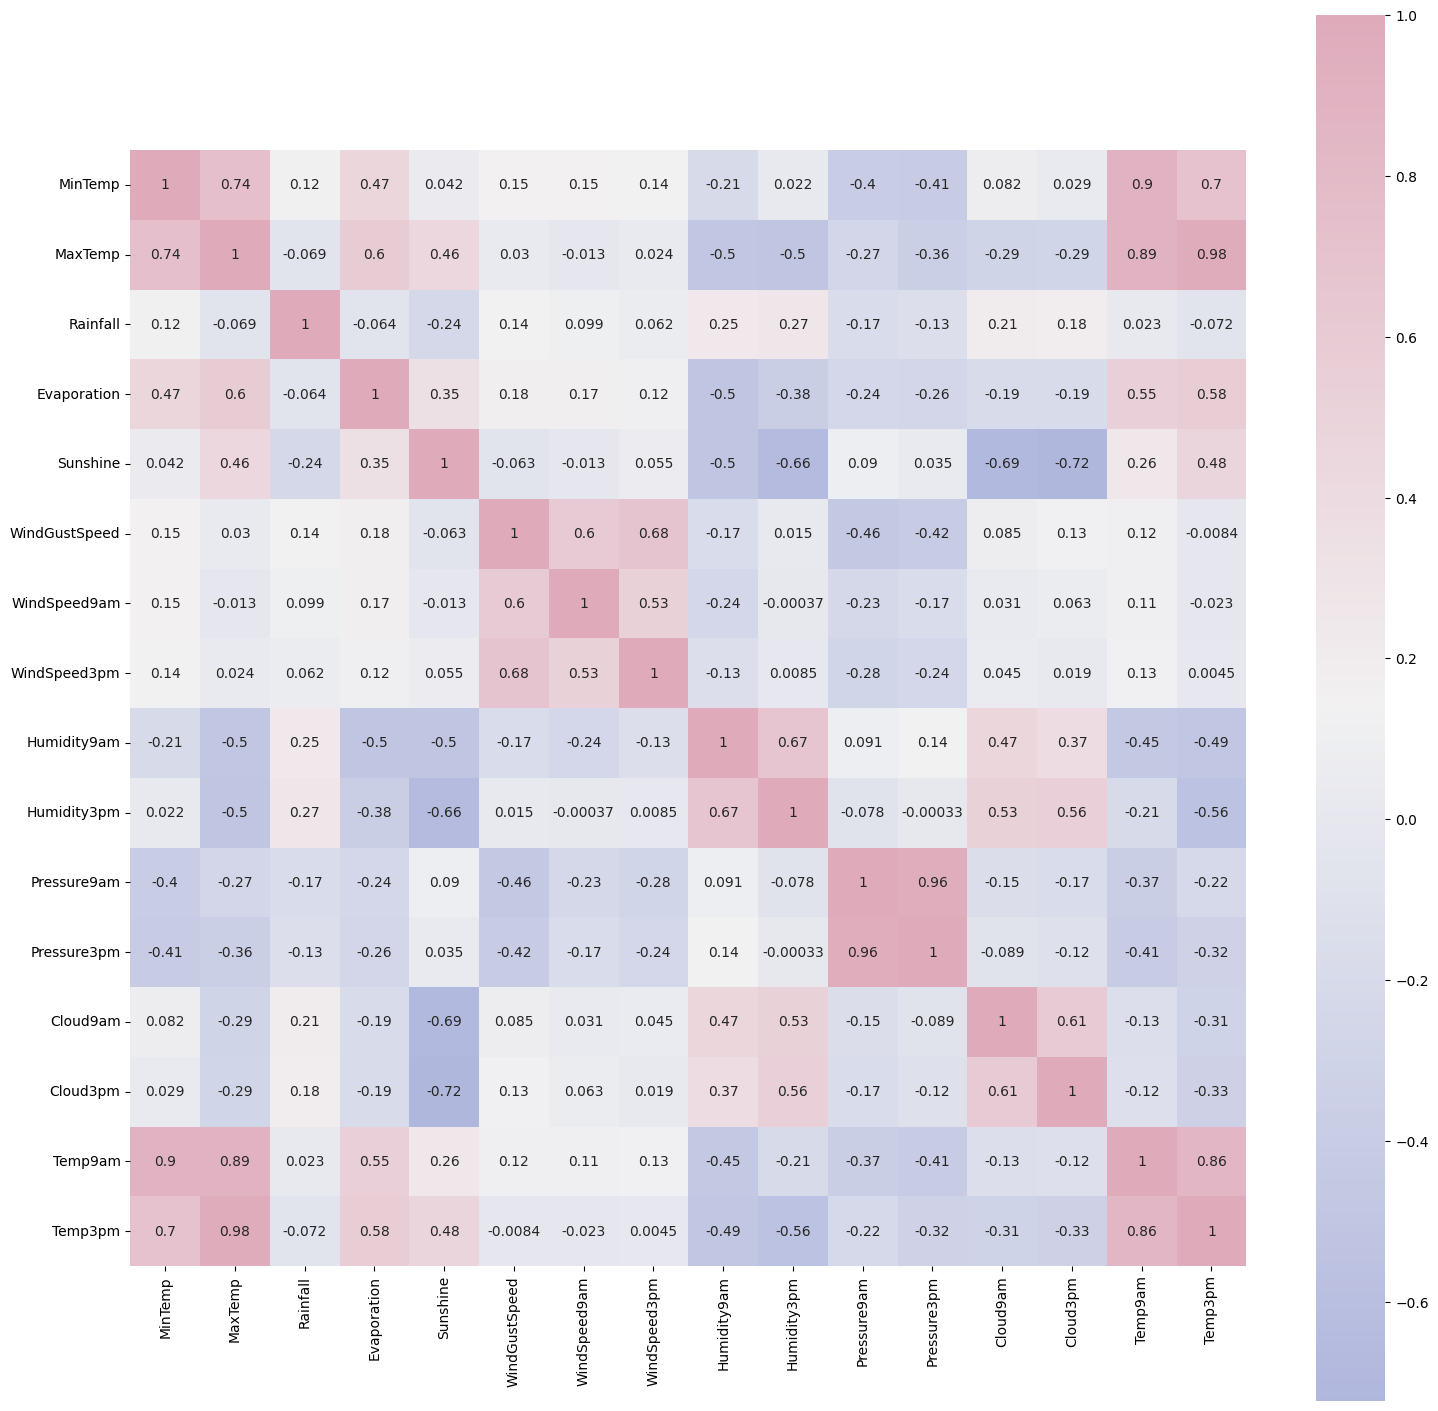

In [ ]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

<ipython-input-13-2ed95abbe02f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


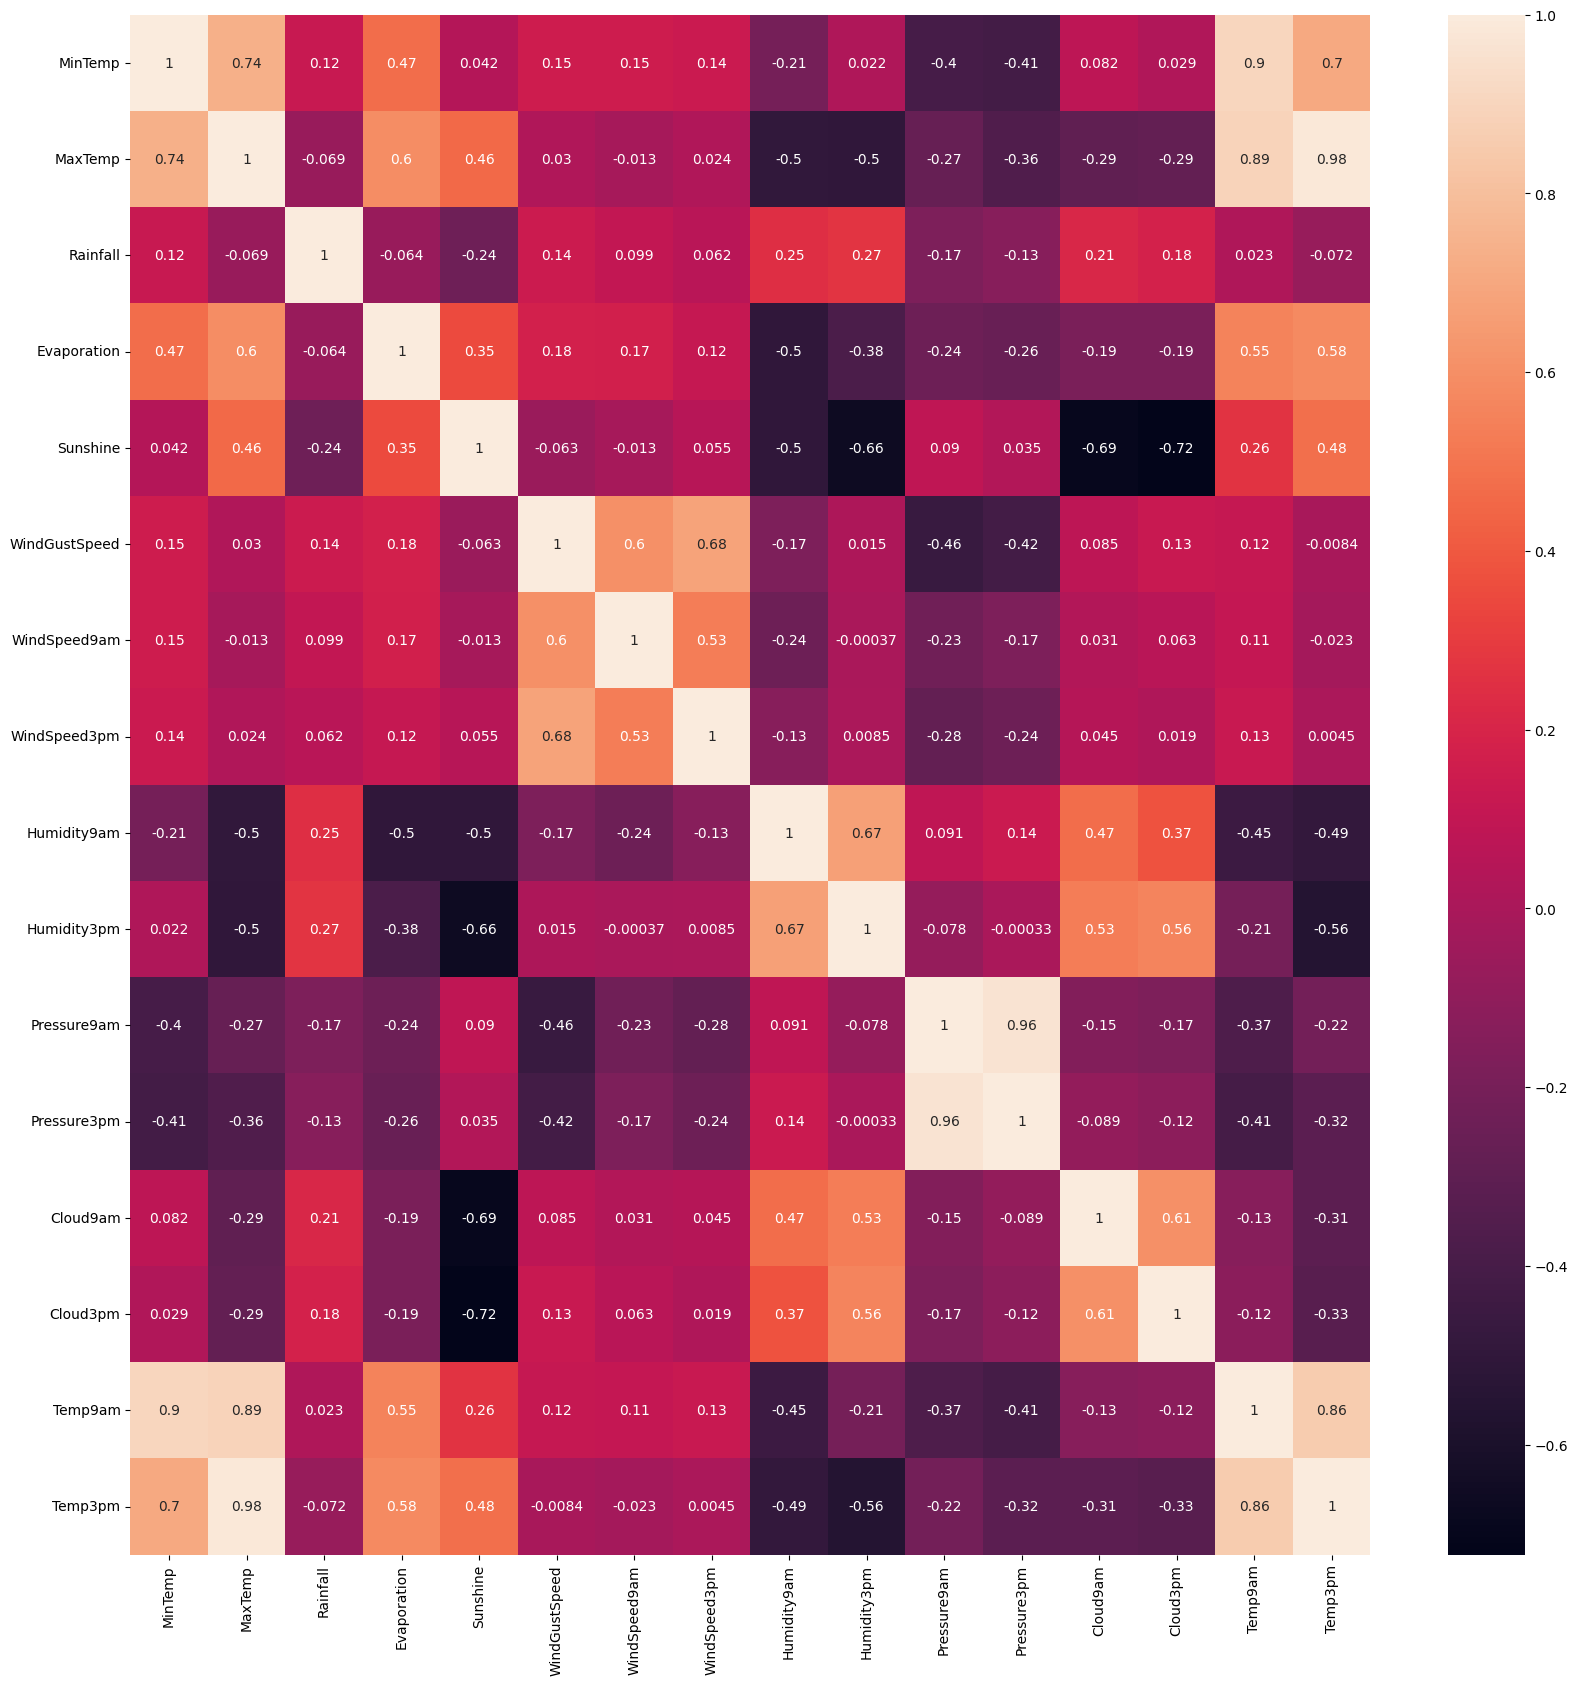

In [ ]:
corrmat = data.corr()
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(corrmat, annot=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81877 entries, 108322 to 1484
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           81877 non-null  object 
 1   Location       81877 non-null  object 
 2   MinTemp        81484 non-null  float64
 3   MaxTemp        81704 non-null  float64
 4   Rainfall       80856 non-null  float64
 5   Evaporation    46618 non-null  float64
 6   Sunshine       42926 non-null  float64
 7   WindGustDir    76314 non-null  object 
 8   WindGustSpeed  76354 non-null  float64
 9   WindDir9am     76241 non-null  object 
 10  WindDir3pm     79604 non-null  object 
 11  WindSpeed9am   81070 non-null  float64
 12  WindSpeed3pm   80301 non-null  float64
 13  Humidity9am    80781 non-null  float64
 14  Humidity3pm    79714 non-null  float64
 15  Pressure9am    73864 non-null  float64
 16  Pressure3pm    73878 non-null  float64
 17  Cloud9am       51430 non-null  float64
 18  Cl

In [ ]:
prediction_target = 'RainTomorrow'


## **Data Cleaning and Feature Engineering**

In [ ]:
data[prediction_target].unique()


array(['Yes', 'No'], dtype=object)

In [ ]:
data = data.dropna(subset=[prediction_target])


In [ ]:
data[prediction_target] = data[prediction_target].map({'No': 0, 'Yes': 1})
data[prediction_target].value_counts()


0    50000
1    31877
Name: RainTomorrow, dtype: int64

**function to get the stats of missing rows**

In [ ]:
def missing_rows_stats(df):
    stats = pd.DataFrame()
    stats['Feature'] = df.columns
    stats['Missing Rows'] = df.columns.map(lambda c: pd.isnull(df[c]).sum())
    stats['Percentage'] = stats['Missing Rows'].map(lambda m: f'{m / len(df):.0%}')
    return stats.sort_values(by='Missing Rows', ascending=False)

**printing missing ratios of each column**

In [ ]:
missing_rows_stats(data)


,Feature,Missing Rows,Percentage
6,Sunshine,38951,48%
5,Evaporation,35259,43%
18,Cloud3pm,32205,39%
17,Cloud9am,30447,37%
15,Pressure9am,8013,10%
16,Pressure3pm,7999,10%
9,WindDir9am,5636,7%
7,WindGustDir,5563,7%
8,WindGustSpeed,5523,7%
10,WindDir3pm,2273,3%


In [ ]:
localized_data = {}
for location, df in data.groupby('Location'):
    df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.Date, format='%Y-%m-%d')))
    df = df.interpolate(method='time', limit_direction='both')
    localized_data[location] = df
data = pd.concat(localized_data.values())
missing_rows_stats(data)

,Feature,Missing Rows,Percentage
6,Sunshine,29929,37%
5,Evaporation,25527,31%
18,Cloud3pm,19903,24%
17,Cloud9am,19903,24%
15,Pressure9am,6733,8%
16,Pressure3pm,6733,8%
9,WindDir9am,5636,7%
7,WindGustDir,5563,7%
8,WindGustSpeed,3604,4%
10,WindDir3pm,2273,3%


In [ ]:
data = data.drop(['Evaporation'], axis='columns')


In [ ]:
data = data.drop(['Sunshine'], axis='columns')


In [ ]:
print(f'Missing data percentage: {len(data[pd.isnull(data.Cloud3pm) & pd.isnull(data.Cloud9am)]) / len(data):.0%}')


Missing data percentage: 24%


In [ ]:
data = data.drop(['Cloud9am', 'Cloud3pm'], axis='columns')


# **Feature Extraction**

In [ ]:
data[pd.notnull(data.Pressure9am) & pd.notnull(data.Pressure3pm)]\
[['Pressure9am', 'Pressure3pm', prediction_target]].corr()[prediction_target].abs().sort_values(ascending=False)

RainTomorrow    1.000000
Pressure9am     0.281660
Pressure3pm     0.257695
Name: RainTomorrow, dtype: float64

In [ ]:
data = data.dropna(subset=['Pressure9am', 'Pressure3pm'])


In [ ]:
WIND_DIRS = [
    'N',
    'NBE',
    'NNE',
    'NEBN',
    'NE',
    'NEBE',
    'ENE',
    'EBN',
    'E',
    'EBS',
    'ESE',
    'SEBE',
    'SE',
    'SEBS',
    'SSE',
    'SBE',
    'S',
    'SBW',
    'SSW',
    'SWBS',
    'SW',
    'SWBW',
    'WSW',
    'WBS',
    'W',
    'WBN',
    'WNW',
    'NWBW',
    'NW',
    'NWBN',
    'NNW',
    'NBW'
]

WIND_DIR_METRICS = {dir: index for index, dir in enumerate(WIND_DIRS)}

def wind_dir_diff(dir1, dir2):
    diff = abs(dir1 - dir2)
    return diff if diff <= 16 else 32 - diff

def fill_wind_dir_features(row):
    row.WindDir9am3pmDiff = wind_dir_diff(row.WindDir9am, row.WindDir3pm)
    row.WindDir9amGustDiff = wind_dir_diff(row.WindDir9am, row.WindGustDir)
    row.WindDir3pmGustDiff = wind_dir_diff(row.WindDir3pm, row.WindGustDir)
    return row

def fill_wind_speed_features(row):
    row.WindSpeed9am3pmDiff = abs(row.WindSpeed9am - row.WindSpeed3pm)
    row.WindSpeed9amGustDiff = abs(row.WindSpeed9am - row.WindGustSpeed)
    row.WindSpeed3pmGustDiff = abs(row.WindSpeed3pm - row.WindGustSpeed)
    return row

In [ ]:
wind_data = data.loc[:].dropna(subset=['WindDir9am', 'WindSpeed9am', 'WindDir3pm', 'WindSpeed3pm', 'WindGustDir', 'WindGustSpeed', prediction_target])
wind_data.WindDir9am = wind_data.WindDir9am.map(lambda d: WIND_DIR_METRICS[d.upper()])
wind_data.WindDir3pm = wind_data.WindDir3pm.map(lambda d: WIND_DIR_METRICS[d.upper()])
wind_data.WindGustDir = wind_data.WindGustDir.map(lambda d: WIND_DIR_METRICS[d.upper()])
wind_data['WindDir9am3pmDiff'] = pd.NA
wind_data['WindSpeed9am3pmDiff'] = pd.NA
wind_data['WindDir9amGustDiff'] = pd.NA
wind_data['WindSpeed9amGustDiff'] = pd.NA
wind_data['WindDir3pmGustDiff'] = pd.NA
wind_data['WindSpeed3pmGustDiff'] = pd.NA
wind_data = wind_data.apply(fill_wind_dir_features, axis='columns')
wind_data = wind_data.apply(fill_wind_speed_features, axis='columns')

In [ ]:
wind_data[[
    prediction_target,
    'WindDir9am',
    'WindSpeed9am',
    'WindDir3pm',
    'WindSpeed3pm',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am3pmDiff',
    'WindSpeed9am3pmDiff',
    'WindDir9amGustDiff',
    'WindSpeed9amGustDiff',
    'WindDir3pmGustDiff',
    'WindSpeed3pmGustDiff'
]].corr()[prediction_target].abs().sort_values(ascending=False)

RainTomorrow            1.000000
WindGustSpeed           0.266886
WindSpeed3pmGustDiff    0.265222
WindSpeed9amGustDiff    0.249159
WindSpeed3pm            0.110871
WindSpeed9am            0.107456
WindDir9am3pmDiff       0.084199
WindGustDir             0.075137
WindDir3pm              0.052775
WindDir9am              0.038670
WindDir3pmGustDiff      0.018131
WindSpeed9am3pmDiff     0.015691
WindDir9amGustDiff      0.006205
Name: RainTomorrow, dtype: float64

In [ ]:
data = data.drop(['WindDir9am', 'WindDir3pm', 'WindGustDir'], axis='columns')
data = data.dropna(subset=['WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed'])
data['WindSpeed9am3pmDiff'] = pd.NA
data['WindSpeed9amGustDiff'] = pd.NA
data['WindSpeed3pmGustDiff'] = pd.NA
data = data.apply(fill_wind_speed_features, axis='columns')

In [ ]:
print(f'Missing data percentage: {pd.isnull(data.RainToday).sum() / len(data) * 100}%')


Missing data percentage: 1.1945392491467577%


In [ ]:
data = data.dropna(subset=['RainToday'])
data.RainToday.describe()

count     72375
unique        2
top          No
freq      52674
Name: RainToday, dtype: object

In [ ]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainToday.value_counts()

<ipython-input-34-d9647c35b167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})


0    52674
1    19701
Name: RainToday, dtype: int64

In [ ]:
date_series = pd.to_datetime(data.Date, format='%Y-%m-%d').map(lambda d: d.timetuple())
data['DateYear'] = date_series.map(lambda d: d.tm_year)
data['DateSeason'] = date_series.map(lambda d: (d.tm_mon // 3) or 4)
data['DateQuarter'] = date_series.map(lambda d: math.ceil(d.tm_mon / 3))
data['DateMonth'] = date_series.map(lambda d: d.tm_mon)
data['DateWeek'] = date_series.map(lambda d: math.ceil(d.tm_yday / 7))
data['DateDayOfYear'] = date_series.map(lambda d: d.tm_yday)

In [ ]:
data['TempDiff'] = data.MaxTemp - data.MinTemp
data['Temp3pm9amDiff'] = data.Temp3pm - data.Temp9am

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72375 entries, 2014-02-18 to 2015-02-02
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  72375 non-null  object 
 1   Location              72375 non-null  object 
 2   MinTemp               72375 non-null  float64
 3   MaxTemp               72375 non-null  float64
 4   Rainfall              72375 non-null  float64
 5   WindGustSpeed         72375 non-null  float64
 6   WindSpeed9am          72375 non-null  float64
 7   WindSpeed3pm          72375 non-null  float64
 8   Humidity9am           72375 non-null  float64
 9   Humidity3pm           72375 non-null  float64
 10  Pressure9am           72375 non-null  float64
 11  Pressure3pm           72375 non-null  float64
 12  Temp9am               72375 non-null  float64
 13  Temp3pm               72375 non-null  float64
 14  RainToday             72375 non-null  int64  
 15  Ra

In [ ]:
excluded_features = set(['Date', 'Location', prediction_target])
features = [c for c in data.columns if c not in excluded_features]

In [ ]:
correlations = data[[prediction_target] + features].corr().abs()[prediction_target]
best_correlations = correlations[correlations > 0.1].drop([prediction_target])
best_correlations.sort_values(ascending=False)

Humidity3pm             0.506955
TempDiff                0.403248
Temp3pm9amDiff          0.386773
RainToday               0.348317
Humidity9am             0.312232
Pressure9am             0.274357
WindSpeed3pmGustDiff    0.262519
WindGustSpeed           0.261745
Pressure3pm             0.250488
WindSpeed9amGustDiff    0.240458
Rainfall                0.233603
Temp3pm                 0.228983
MaxTemp                 0.188636
WindSpeed9am            0.107509
WindSpeed3pm            0.106864
MinTemp                 0.103636
Name: RainTomorrow, dtype: float64

In [ ]:
features = list(best_correlations.index)
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(data[features])
X = data
y = data[prediction_target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=data.Location)
train_X = scaler.transform(train_X[features])
test_X = scaler.transform(test_X[features])

In [ ]:
missing_rows_stats(data)


,Feature,Missing Rows,Percentage
0,Date,0,0%
14,RainToday,0,0%
25,TempDiff,0,0%
24,DateDayOfYear,0,0%
23,DateWeek,0,0%
22,DateMonth,0,0%
21,DateQuarter,0,0%
20,DateSeason,0,0%
19,DateYear,0,0%
18,WindSpeed3pmGustDiff,0,0%


**Features taken to consideration to get prediction after data preprocessing**

In [ ]:
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday', 'WindSpeed9amGustDiff', 'WindSpeed3pmGustDiff', 'TempDiff', 'Temp3pm9amDiff']


In [ ]:
print(len(features))

16


## **MODEL MAKING**

In [ ]:
models = [
    GaussianNB(),
    BernoulliNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

**we take 6 different types of models. Those are**

GaussianNB model

BernoulliNB Model

LogisticRegression Model

DecisionTreeClassifier Model

RandomForestClassifier Model

GradientBoostingClassifier Model


**fitting the models**

In [ ]:
for model in models:
    model.fit(train_X, train_y)

In [ ]:
pd.DataFrame(
    [(type(m).__name__, accuracy_score(test_y, m.predict(test_X))) for m in models],
    columns=['Model', 'Accuracy Score']
).sort_values('Accuracy Score', ascending=False)

,Model,Accuracy Score
4,RandomForestClassifier,0.806701
5,GradientBoostingClassifier,0.804076
2,LogisticRegression,0.796960
0,GaussianNB,0.772435
1,BernoulliNB,0.754819
3,DecisionTreeClassifier,0.728636


In [ ]:
def train(model):
    model.fit(train_X,train_y)
    print(f"Training accuracy of {str(model)} is {model.score(train_X,train_y)}")
    print(f"testing accuracy of {str(model)} is {model.score(test_X,test_y)}")

getting accuracy scores of both testing and training data
**bold text**

In [ ]:
for m in models:
  train(m)


Training accuracy of GaussianNB() is 0.7716407599309154
testing accuracy of GaussianNB() is 0.7724352331606218
Training accuracy of BernoulliNB() is 0.7564594127806563
testing accuracy of BernoulliNB() is 0.7548186528497409
Training accuracy of LogisticRegression() is 0.7953540587219343
testing accuracy of LogisticRegression() is 0.7969602763385146
Training accuracy of DecisionTreeClassifier() is 1.0
testing accuracy of DecisionTreeClassifier() is 0.7274611398963731
Training accuracy of RandomForestClassifier() is 0.9999481865284974
testing accuracy of RandomForestClassifier() is 0.8073229706390328
Training accuracy of GradientBoostingClassifier() is 0.8039205526770293
testing accuracy of GradientBoostingClassifier() is 0.8040759930915371



# **MODEL SELECTION**

**getting cross validation scores**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print(cross_val_score(GaussianNB(), train_X, train_y, cv = 5))

[0.77633851 0.76839378 0.76865285 0.76675302 0.77841105]


In [ ]:
print(cross_val_score(BernoulliNB(), train_X, train_y, cv = 5))

[0.7597582  0.75414508 0.75241796 0.75319516 0.76303972]


In [ ]:
print(cross_val_score(DecisionTreeClassifier(), train_X, train_y, cv = 5))

[0.72495682 0.72288428 0.72271157 0.72659758 0.7224525 ]


In [ ]:
print(cross_val_score(RandomForestClassifier(), train_X, train_y, cv = 5))

[0.80345423 0.80120898 0.80466321 0.79645941 0.80906736]


In [ ]:
print(cross_val_score(GradientBoostingClassifier(), train_X, train_y, cv = 5))

[0.80215889 0.80112263 0.79715026 0.79481865 0.80751295]


**getting confusion matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        test_X,
        test_y
    )

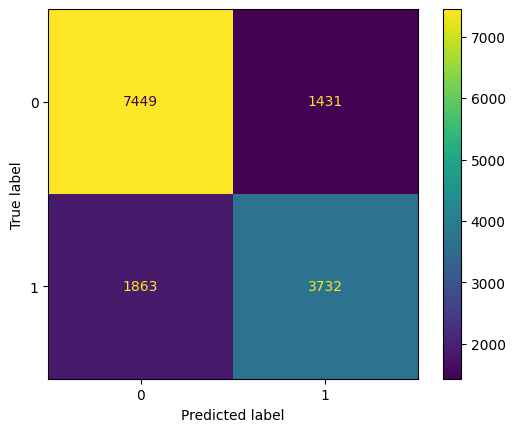

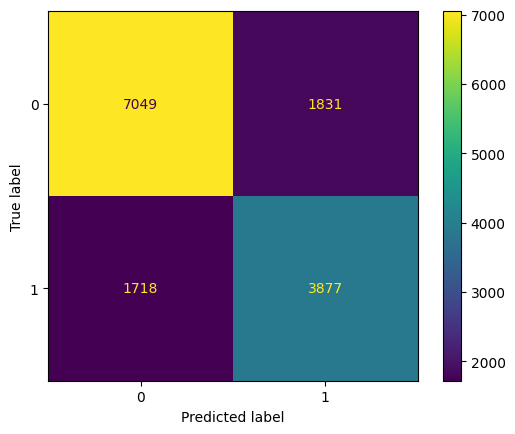

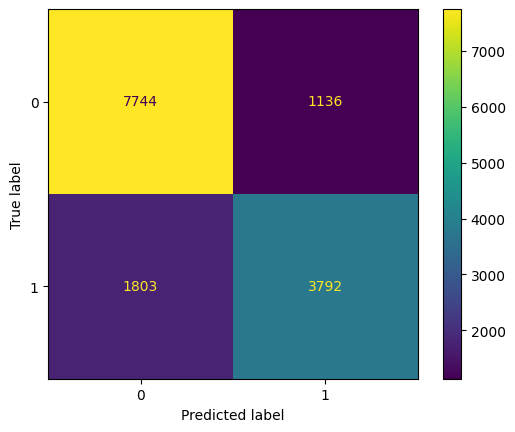

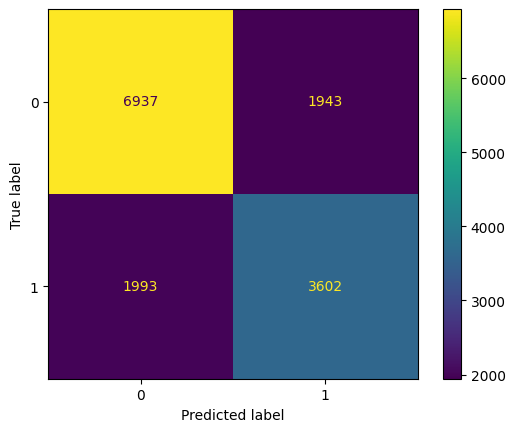

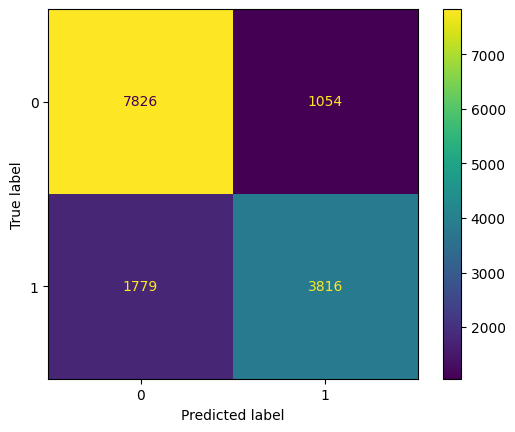

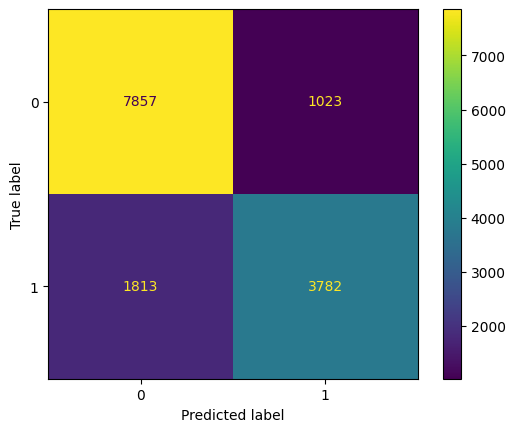

In [ ]:
for model in models:
  m = model.fit(train_X, train_y)
  conf_matrix(m)

In [ ]:
models = pd.DataFrame({
    "Models": ["GaussianNB" , "BernoulliNB", "LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier"],
    "Score":[accuracy_score(test_y, m.predict(test_X)) for m in models]

})
models.sort_values(by="Score" , ascending=False)

,Models,Score
4,RandomForestClassifier,0.804283
5,GradientBoostingClassifier,0.804076
2,LogisticRegression,0.796960
0,GaussianNB,0.772435
1,BernoulliNB,0.754819
3,DecisionTreeClassifier,0.728083


In [ ]:
import seaborn as sns



**graph to decide which have the high accuracy score**

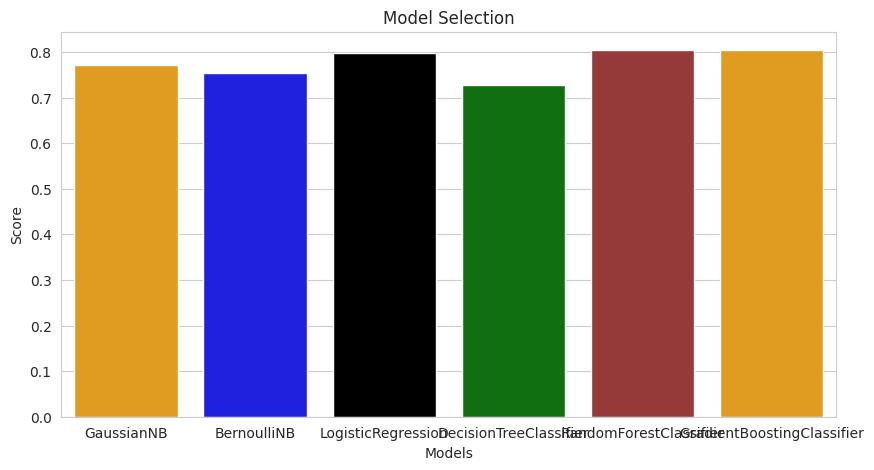

In [ ]:
colors= ['orange' , 'blue','black','green', 'brown']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show()

## **PREDICTION MODEL**

In [ ]:
import numpy as np

In [ ]:
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427)
#change input_data 2 numpy_array 2 make prediction
input_data_as_numpy_array = np.asarray(input_data)
#print(input_data)
#reshape the array as v r predicting the output for 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
model = RandomForestClassifier()
n = model.fit(train_X, train_y)

#prediction
prediction = n.predict(input_data_reshaped)
#print(prediction) #returns a list with element [0] if Malignant else [1] for Benign

if (prediction[0] == 0):
  print('No Rain Tomorrow')
else:
  print("Yes, There will be a rain tomorrow")

No Rain Tomorrow
